## Author# Ganesh Kale
## Project Milestone# 5
## Date# Nov 15, 2021

### Project Overview:

Project Overview:
House Prices in USA are booming, and house prices will continue to race ahead, at nearly twice the pace predicted before this year. This is what we hear or read when talk about housing market in USA. Buying house is very critical job, one should be aware of lots of things before buying house and when buying house nobody sure about when is the right time to buy house and wants to have some tool that would consider all the factors determining house price and predict the house price. Predicting the house price is challenging but doable and with help of machine learning algorithms this can be achieved.

This is the topic chosen for the final project to make data ready by collecting from different sources and cleaning, transforming, and merging all these data to make it final dataset in the ready format for machine learning algorithms so predicting house price model can be developed by training and validating on housing market dataset.
To build predicting house price model, we should consider different factors such as house information, and facilities available in neighborhood such school, hospitals etc.
As part of this exercise, Austin, Texas housing market data will be collected from 3 difference sources such as csv file with house related information, json file for hospital in neighborhood and tabular data for school information from website.

### Data Set Information - 

1.	CSV File – The csv file is acquired from kaggele website, this data set have Austin TX area house information, such as address, year built, sale price, No. of bedroom, bathrooms, lot area etc. Please refer data dictionary for more information about data.

Link to Data Set - https://www.kaggle.com/ericpierce/austinhousingprices

2. Tabular data – The neighborhood school information will be pulled from below websites, since the website has school information such as address, type of school, student per teacher ratio, ratings and percentile, staar awards ratings etc. but we dont need grade level rating so we are going to remove them and clean data and at last will be joined with main data set based in zicode value.

Links to data – https://www.schooldigger.com/go/TX/city/Austin/search.aspx

3. Json File – The neighborhood public health locations information is pulled from data.gov using API. The data is in json format, and it will have public health locations information such as facility name, address, hours of operation, website etc. Data dictionary has all the detailed information about this dataset. 

Link to data set – https://catalog.data.gov/dataset/austin-public-health-locations

### Import required packages

In [19]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers
import missingno as msno  # display null values

from sklearn.preprocessing import LabelEncoder   # to encode categorical data type
import sqlite3   # connection to sqlite db

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# load all the three data sets into 3 different dataframes

homes = pd.read_csv("Data/project_file1.csv")

school = pd.read_csv("Data/school_info_file2.csv")

health_loc = pd.read_csv("Data/health_facility_info_file3.csv")

In [3]:
# show shape and head of each df

homes.shape
homes.head()

(14522, 24)

,city,streetAddress,zipcode,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,...,latestPrice,numPriceChanges,latest_saleyear,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,total_area_sqft,home_age
0,pflugerville,14424 Lake Victor Dr,78660,1.98,2,1,1,1,1,0,...,305.000,5,2019,6011.0,2601.0,3.0,4,2,8612.0,9
1,pflugerville,1104 Strickling Dr,78660,1.98,2,1,1,1,1,0,...,295.000,1,2020,6185.0,1768.0,2.0,4,1,7953.0,8
2,pflugerville,1408 Fort Dessau Rd,78660,1.98,0,1,1,0,1,0,...,256.125,1,2019,7840.0,1478.0,2.0,3,1,9318.0,3
3,pflugerville,1025 Strickling Dr,78660,1.98,2,1,1,1,1,0,...,240.000,4,2018,6098.0,1678.0,2.0,3,1,7776.0,8
4,pflugerville,15005 Donna Jane Loop,78660,1.98,0,1,1,0,1,0,...,239.900,3,2018,6708.0,2132.0,3.0,3,2,8840.0,19


In [4]:
# show shape and head of each df

school.shape
school.head()

(269, 31)

,Name,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,...,Two orMore Races,Average Standard Score (2021),Statewide Rank (2021),State Percentile (2021),Average Standard Score (2019),Statewide Rank (2019),State Percentile (2019),Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local Funds
0,Canyon Creek Elementary,0,24,10210 Ember Glen Dr,Austin,78726,Travis County,20,0,0,...,34.0,99.4,22.0,193,99.4,8.0,189,186,170,135
1,Patsy Sommer Elementary,0,33,16200 Avery Ranch Blvd,Austin,78717,Williamson County,20,0,0,...,57.0,99.4,26.0,192,98.4,46.0,186,142,152,80
2,Texans Can Academy - Austin,2,20,2406 Rosewood Ave,Austin,78702,Travis County,21,0,0,...,7.0,4.8,1784.0,78,5.3,1738.0,88,71,75,250
3,Wayside Eden Park Academy,2,33,6215 Menchaca Rd,Austin,78745,Travis County,32,0,0,...,27.0,43.7,2347.0,94,65.9,1231.0,110,244,218,197
4,Wayside Real Learning Academy,2,33,6405 S Ih 35,Austin,78744,Travis County,32,0,0,...,6.0,34.1,2872.0,72,36.7,2903.0,52,164,215,95


In [5]:
# show shape and head of each df

health_loc.shape
health_loc.head()

(32, 17)

,Facility Name,Zip Code,Hours,Website,Phone Number,Building ID,Ownership Status,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built,street_name,city,state,lat,long
0,Bastrop WIC Clinic,78602,1,['http://www.austintexas.gov/department/clarks...,512-972-4942,BAS,Lease,The Marketplace at Bastrop,4,0,1400,NaN,443 Texas Highway 71,Bastrop,Texas,0,0
1,Blackland Neighborhood Center,78722,19,['http://www.austintexas.gov/department/clarks...,512-972-5790,BNC,Own,City of Austin,3,6,347,1984.0,2005 Salina St,Austin,Texas,20,22
2,Clarksville Community Health Center,78703,15,['http://www.austintexas.gov/department/clarks...,512-972-4942,CNC,Own,City of Austin,8,4,3500,NaN,1000 Toyath Street,Austin,Texas,21,28
3,Del Valle WIC Clinic,78617,3,['http://www.austintexas.gov/department/del-va...,512-972-4942,DEL,NaN,Travis County,4,1,1000,NaN,3518 FM 973,Del Valle,Texas,2,3
4,East Austin Neighborhood Center,78702,21,['http://www.austintexas.gov/department/east-a...,512-972-6650,EAN,Own,City of Austin,4,2,4304,1981.0,211 Comal St,Austin,Texas,16,24


In [13]:
# make connection to sqlite db using sqlalchemy

from sqlalchemy import create_engine

engine = create_engine('sqlite:///dsc540.db', echo=True)   # echo=True to show the logs details when connection is established

In [15]:
# function to load data to sqlite table 

def load_data(table_name, df):
    
    with engine.connect() as conn:
        df.to_sql(table_name,conn,if_exists='replace')
        print(f"Data Loaded to table: {table_name}, with total records: {df.shape[0]}")


In [16]:
# load homes data to sqlite

load_data(table_name='austin_homes',df = homes)

2021-11-18 20:36:21,221 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("austin_homes")
2021-11-18 20:36:21,225 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:36:21,226 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("austin_homes")
2021-11-18 20:36:21,227 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:36:21,231 INFO sqlalchemy.engine.Engine 
CREATE TABLE austin_homes (
	"index" BIGINT, 
	city TEXT, 
	"streetAddress" TEXT, 
	zipcode BIGINT, 
	"propertyTaxRate" FLOAT, 
	"garageSpaces" BIGINT, 
	"hasAssociation" BIGINT, 
	"hasCooling" BIGINT, 
	"hasGarage" BIGINT, 
	"hasHeating" BIGINT, 
	"hasSpa" BIGINT, 
	"hasView" BIGINT, 
	"homeType" BIGINT, 
	"parkingSpaces" BIGINT, 
	"yearBuilt" BIGINT, 
	"latestPrice" FLOAT, 
	"numPriceChanges" BIGINT, 
	latest_saleyear BIGINT, 
	"lotSizeSqFt" FLOAT, 
	"livingAreaSqFt" FLOAT, 
	"numOfBathrooms" FLOAT, 
	"numOfBedrooms" BIGINT, 
	"numOfStories" BIGINT, 
	total_area_sqft FLOAT, 
	home_age BIGINT
)


2021-11-18 20:36:21,

In [24]:
# load school data to sqlite

load_data(table_name='austin_school',df = school)

2021-11-18 20:42:59,966 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("austin_school")
2021-11-18 20:42:59,968 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:42:59,970 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("austin_school")
2021-11-18 20:42:59,971 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:42:59,978 INFO sqlalchemy.engine.Engine 
CREATE TABLE austin_school (
	"index" BIGINT, 
	"Name" TEXT, 
	"Type" BIGINT, 
	"Grades" BIGINT, 
	"Address" TEXT, 
	"City" TEXT, 
	"Zip" BIGINT, 
	"County" TEXT, 
	"District" BIGINT, 
	"Is Charter" BIGINT, 
	"Is Magnet" BIGINT, 
	"Is Title I" BIGINT, 
	"Enrollment" FLOAT, 
	"Full-time Teachers" FLOAT, 
	"Student/Teacher Ratio" FLOAT, 
	"Free/DiscountedLunch Recipients" BIGINT, 
	"White" FLOAT, 
	"Black" FLOAT, 
	"Hispanic" FLOAT, 
	"Asian" FLOAT, 
	"AmericanIndian" FLOAT, 
	"PacificIslander" FLOAT, 
	"Two orMore Races" FLOAT, 
	"Average Standard Score (2021)" FLOAT, 
	"Statewide Rank (2021)" FLOAT, 
	"State Percent

In [25]:
# load health location info data to sqlite

load_data(table_name='austin_health_location',df = health_loc)

2021-11-18 20:43:24,898 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("austin_health_location")
2021-11-18 20:43:24,899 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:43:24,900 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("austin_health_location")
2021-11-18 20:43:24,901 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-18 20:43:24,904 INFO sqlalchemy.engine.Engine 
CREATE TABLE austin_health_location (
	"index" BIGINT, 
	"Facility Name" TEXT, 
	"Zip Code" BIGINT, 
	"Hours" BIGINT, 
	"Website" TEXT, 
	"Phone Number" TEXT, 
	"Building ID" TEXT, 
	"Ownership Status" TEXT, 
	"Owner" TEXT, 
	"Occupying Division" BIGINT, 
	"Occupancy Type" BIGINT, 
	"Sq. Ft. " BIGINT, 
	"Year Built " FLOAT, 
	street_name TEXT, 
	city TEXT, 
	state TEXT, 
	lat BIGINT, 
	long BIGINT
)


2021-11-18 20:43:24,905 INFO sqlalchemy.engine.Engine [no key 0.00084s] ()
2021-11-18 20:43:24,907 INFO sqlalchemy.engine.Engine COMMIT
2021-11-18 20:43:24,908 INFO sqlalchemy.engine.Engine CREATE IND

In [26]:
# create function to fetch data by running query on db table

def fetch_data(query):
    
    with sqlite3.connect("dsc540.db", timeout=10) as conn:
        
        cursor = conn.cursor()
        
        results = cursor.execute(query)
        
        return results

In [27]:
# test the data loaded successfully into the tables

query='select * from austin_homes limit 2'
for row in fetch_data(query):
    print(row)

(0, 'pflugerville', '14424 Lake Victor Dr', 78660, 1.98, 2, 1, 1, 1, 1, 0, 0, 7, 2, 2012, 305.0, 5, 2019, 6011.0, 2601.0, 3.0, 4, 2, 8612.0, 9)
(1, 'pflugerville', '1104 Strickling Dr', 78660, 1.98, 2, 1, 1, 1, 1, 0, 0, 7, 2, 2013, 295.0, 1, 2020, 6185.0, 1768.0, 2.0, 4, 1, 7953.0, 8)


In [28]:
# test the data loaded successfully into the tables

query='select * from austin_school limit 2'
for row in fetch_data(query):
    print(row)

(0, 'Canyon Creek Elementary', 0, 24, '10210 Ember Glen Dr', 'Austin', 78726, 'Travis County', 20, 0, 0, 0, 413.0, 30.0, 13.8, 80, 153.0, 4.0, 60.0, 161.0, 1.0, 0.0, 34.0, 99.4, 22.0, 193, 99.4, 8.0, 189, 186, 170, 135)
(1, 'Patsy Sommer Elementary', 0, 33, '16200 Avery Ranch Blvd', 'Austin', 78717, 'Williamson County', 20, 0, 0, 0, 1219.0, 72.0, 17.0, 23, 314.0, 15.0, 109.0, 719.0, 3.0, 2.0, 57.0, 99.4, 26.0, 192, 98.4, 46.0, 186, 142, 152, 80)


In [29]:
# test the data loaded successfully into the tables

query='select * from austin_health_location limit 2'
for row in fetch_data(query):
    print(row)

(0, 'Bastrop WIC Clinic', 78602, 1, "['http://www.austintexas.gov/department/clarksville-community-health-center', None]", '512-972-4942', 'BAS', 'Lease', 'The Marketplace at Bastrop', 4, 0, 1400, None, '443 Texas Highway 71', 'Bastrop', 'Texas', 0, 0)
(1, 'Blackland Neighborhood Center', 78722, 19, "['http://www.austintexas.gov/department/clarksville-community-health-center', None]", '512-972-5790', 'BNC', 'Own', 'City of Austin', 3, 6, 347, 1984.0, '2005 Salina St', 'Austin', 'Texas', 20, 22)


In [47]:
# create query to join all three tables on zip code to create one dataframe

main_query = '''
        select h.*, s.*,hl.*
        from austin_homes h
        inner join austin_school s on h.zipcode = s.Zip
        inner join austin_health_location hl on h.zipcode = hl."Zip Code"
        
'''

In [48]:
# fetch data from three tables by joining them

results = fetch_data(main_query)

In [50]:
# store columns in the list

col_names = []

for col in results.description:
    col_names.append(col[0])

In [51]:
# store data in to variable

data = results.fetchall()

In [52]:
# create df to store dta from 3 tables into one

austin = pd.DataFrame(data=data, columns=col_names)

In [53]:
# display shape and head of main df

austin.shape
austin.head()

(120223, 75)

,index,city,streetAddress,zipcode,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,Owner,Occupying Division,Occupancy Type,Sq. Ft.,Year Built,street_name,city,state,lat,long
0,23,austin,5509 Bonneville Bnd,78744,1.98,2,1,1,1,1,...,"LX-Northbluff Center, L.P.",4,0,2100,NaN,"6801 South IH-35, Suite I & J",Austin,Texas,1,29
1,23,austin,5509 Bonneville Bnd,78744,1.98,2,1,1,1,1,...,"LX-Northbluff Center, L.P.",4,0,2100,NaN,"6801 South IH-35, Suite I & J",Austin,Texas,1,29
2,23,austin,5509 Bonneville Bnd,78744,1.98,2,1,1,1,1,...,"LX-Northbluff Center, L.P.",4,0,2100,NaN,"6801 South IH-35, Suite I & J",Austin,Texas,1,29
3,23,austin,5509 Bonneville Bnd,78744,1.98,2,1,1,1,1,...,"LX-Northbluff Center, L.P.",4,0,2100,NaN,"6801 South IH-35, Suite I & J",Austin,Texas,1,29
4,23,austin,5509 Bonneville Bnd,78744,1.98,2,1,1,1,1,...,"LX-Northbluff Center, L.P.",4,0,2100,NaN,"6801 South IH-35, Suite I & J",Austin,Texas,1,29


In [64]:
# save consolidated dataset into csv file

austin.to_csv('Data/dsc540_dataset_austin_houses_area.csv', index=False)

# Visualization:

Since this data set will be used to create model to predict the house prices, so different factors will be considered to see if those have any direct or indirect impact on house prices. All different factors will be plotted against the house price to see if there is any correlation between them and also all other features will be tested for multi-collinearility to make sure there are no correlation between features themselves.

Scatter plot will be used most to see collinearility.

### 1. Distribution of House Prices

/Users/ganeshkale/work/dsc550datamining/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


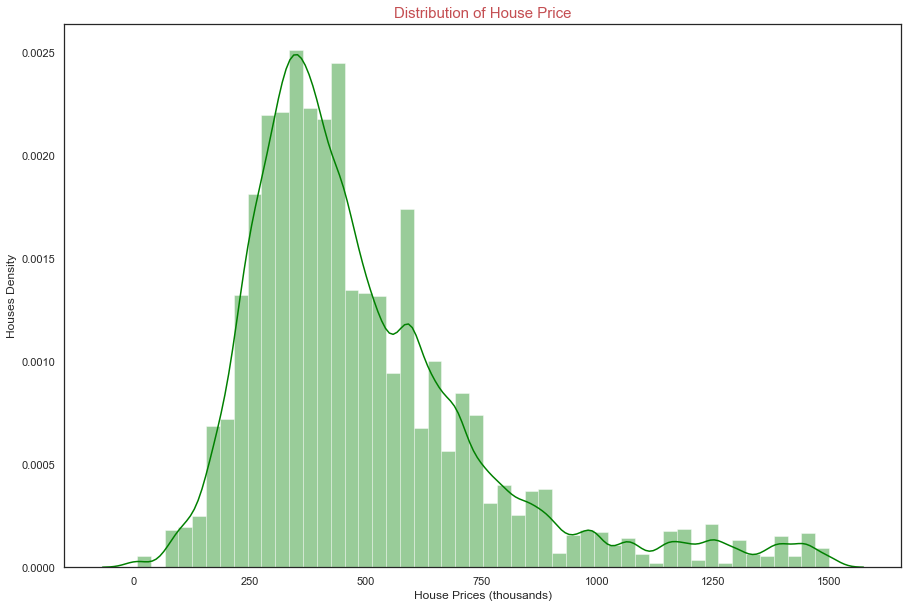

In [72]:
sns.set(style='white')
plt.figure(figsize=(15,10))

sns.distplot(a = austin['latestPrice'],color='green' )
plt.title('Distribution of House Price', fontdict = {'color':'r','fontsize':15})
plt.xlabel("House Prices (thousands)")
plt.ylabel("Houses Density")
plt.show();

### 2. Correlation of house price and key features of the house and surrounding area such as -
- number of bedrooms , number of bathrooms, enrollment,home type, living area, lot size, house age, occupancy type etc

<Figure size 1080x864 with 0 Axes>

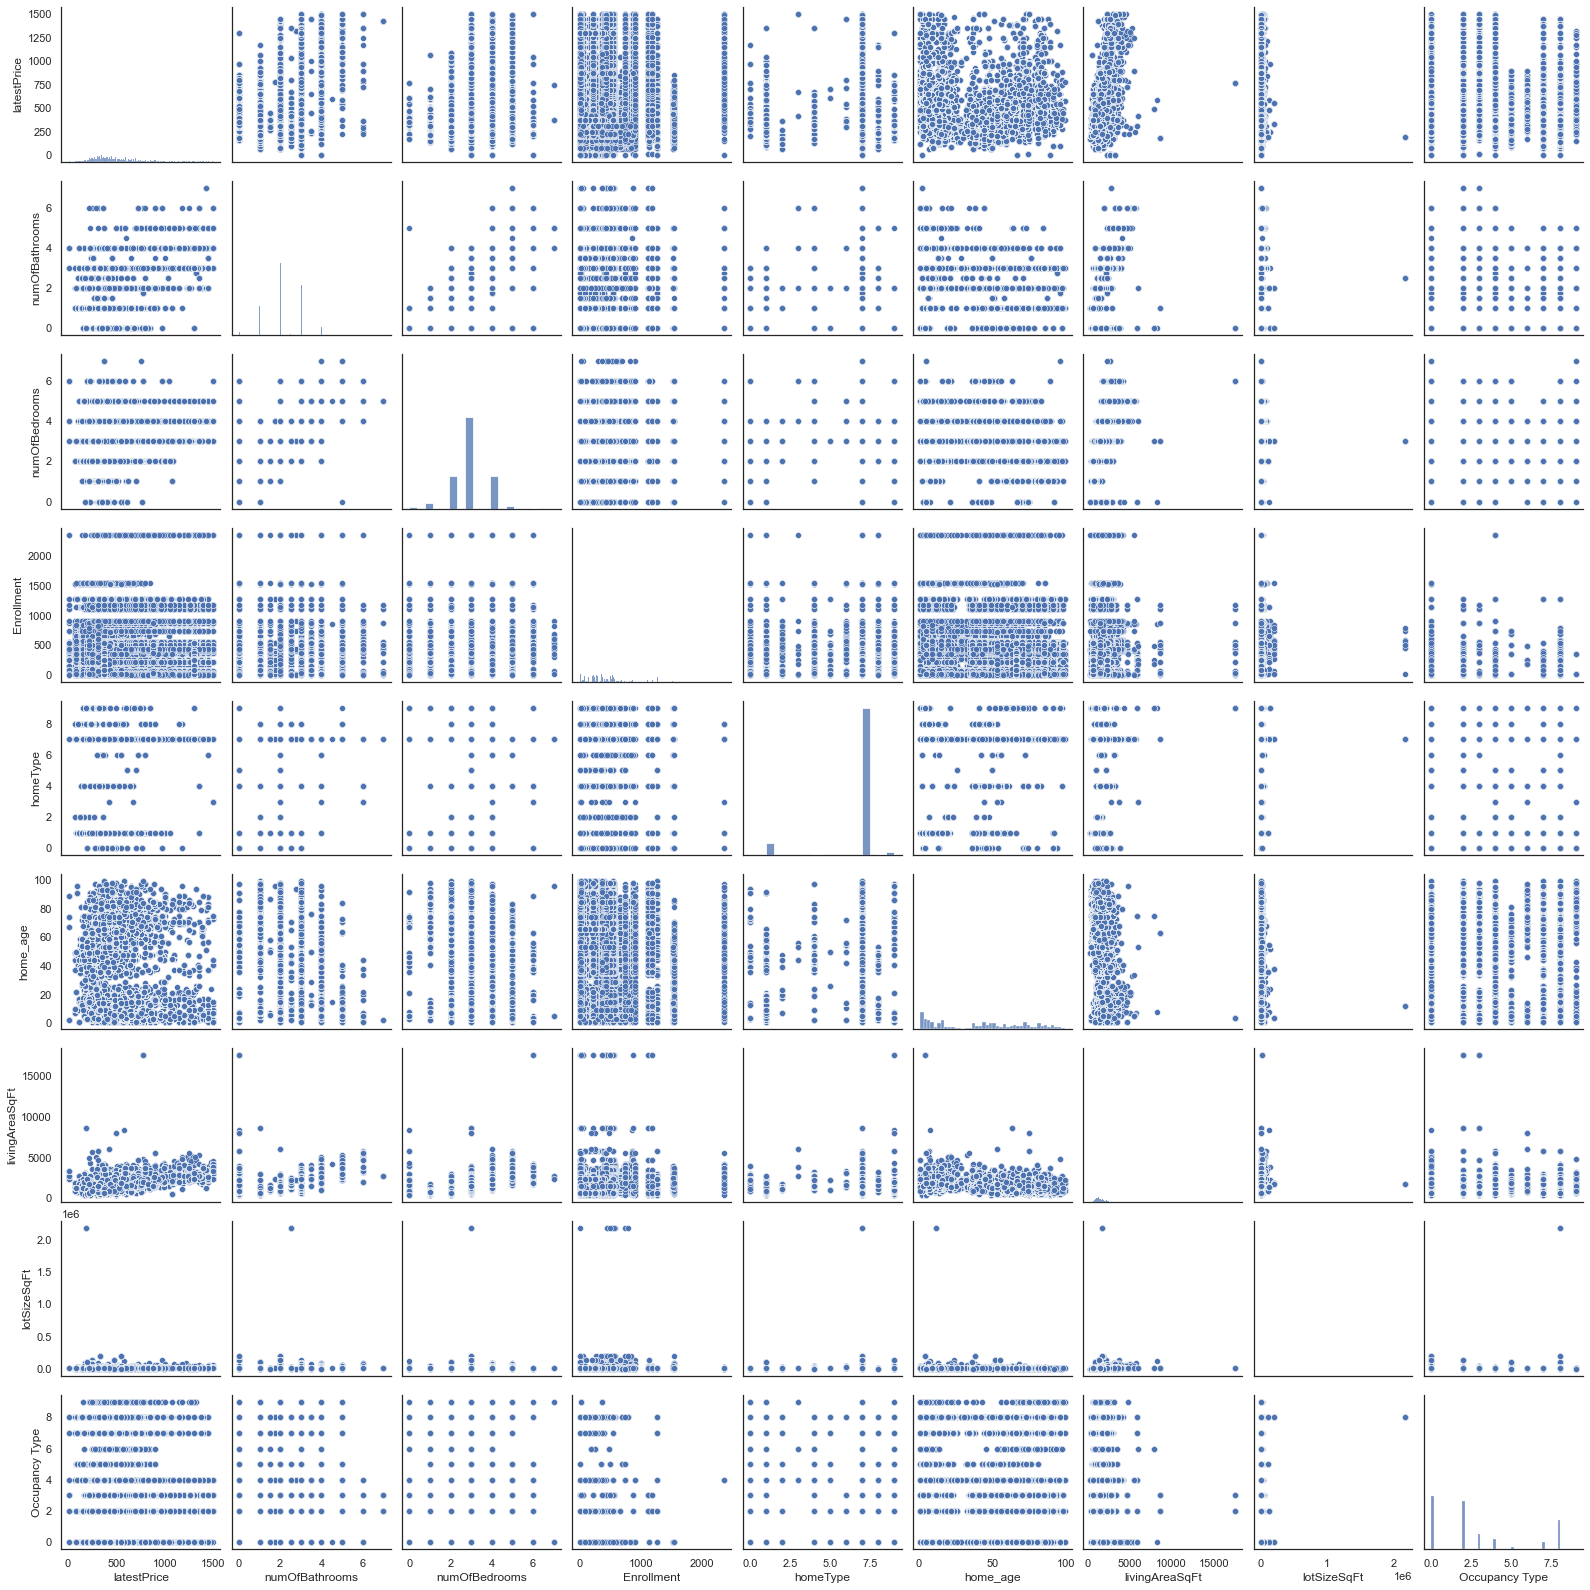

In [100]:
# plot pair plot to see multi-collinearility of selected features

cols_name = ['latestPrice','numOfBathrooms','numOfBedrooms','Enrollment','homeType','home_age','livingAreaSqFt','lotSizeSqFt',
            'Occupancy Type']

sns.set(style='white')
plt.figure(figsize=(15,12))

sns.pairplot(data = austin[cols_name])
plt.show();

- Histogram: The histogram chart of home sale price shows the distribution of sale proces among the dataset. it shows that house prices are centrally distributed and dont have much outliers.

- Pair Plot: This is basically scatter plot plotted for different pairs to see the colinearity between two variables. Based on this chart we can see that house prices are correlated to living area, age of house, number of bedrooms etc.

# END